# 1 Author

**Student Name**:  Zhong Zhenghan

**Student ID**:  210982480

**Github**:  https://github.com/buptxinghan/CBU5201_miniproject_Zhenghan


# 2 Problem formulation

在基础部分中，我们想要解决的问题有以下两个：

- 微笑检测：确定图片中的人是否在微笑。
- 3D头部姿态估计：预测头部的3D方向。

## 2.1 微笑检测
- 我需要解决的机器学习问题是根据人脸图像判断一个人是否在微笑。微笑是人类表达情感的一种重要方式，可以反映一个人的心情、态度和性格。微笑检测可以应用在很多领域，比如人机交互、情感分析、社交媒体、广告推荐等。

## 2.2 3D头部姿态估计
- 我需要解决的机器学习问题是在给定的图像中预测人头的方向。这个方向有很多应用，比如人脸识别，人机交互，驾驶员监测，和增强现实。它也很有挑战性，因为它需要从高维和噪声的数据中学习。

**其中，微笑检测问题是一个分类问题，而3D头部姿态估计问题是一个回归问题，因此我分别用分类模型和回归模型来解决这两个问题。**

# 3 Machine Learning pipeline
我的机器学习流程包括以下几个阶段：
- **数据加载**：从图像文件夹和标签文件中读取数据，创建一个自定义的数据集类，用来加载和处理图像。
- **数据划分**：将数据集划分为训练集、验证集和测试集，用不同的数据加载器来加载不同的数据子集。
- **数据转换**：对图像进行一些预处理和增强，比如缩放、裁剪、翻转、归一化等，用来提高模型的泛化能力和稳定性。
- **模型构建**：使用预训练的 ResNet50 模型作为特征提取器，然后在最后一层添加一个全连接层，用来进行二分类（微笑或不微笑）。
- **模型训练**：使用交叉熵损失函数和随机梯度下降优化器，对模型进行训练，每个 epoch 结束后，对验证集进行评估，打印验证损失。
- **模型测试**：使用测试集对模型进行测试，计算模型在测试集上的准确率，混淆矩阵和其他性能指标，展示模型的效果。
- **模型保存**：将模型的状态字典保存到本地文件，方便以后加载和使用。


# 4 Transformation stage
转换阶段的目的是对输入的图片进行一些预处理和增强，以提高模型的性能和泛化能力。

在转换阶段，我对图像进行了以下几种转换：
- **裁剪人脸**：使用 OpenCV 的人脸检测器，从图像中检测出人脸的位置，然后将人脸区域裁剪出来，作为模型的输入。这样可以去除图像中的无关信息，提高模型的关注度和准确度。
- **缩放图像**：将图像缩放到 224 x 224 的大小，这是 ResNet50 模型的输入尺寸，保证输入的一致性和兼容性。
- **随机水平翻转**：对图像进行随机的水平翻转，这是一种数据增强的方法，可以增加数据的多样性和随机性，防止模型过拟合。
- **转换为张量**：将图像从 PIL.Image 格式转换为 PyTorch 的张量格式，方便模型的计算和处理。
- **归一化图像**：对图像的每个通道进行归一化，使用的是 ResNet50 模型在 ImageNet 数据集上的均值和标准差，这样可以使图像的分布更加接近预训练模型的分布，提高模型的性能。

# 5 Modelling

在建模阶段，我使用了预训练的 ResNet50 模型作为我的基础模型，它是一个经过验证的深度卷积神经网络，具有很强的特征提取能力，可以在图像分类和特征提取方面表现出很好的效果。我使用了预训练的模型，是因为它已经在大规模的图像数据集上进行了训练，可以利用迁移学习的思想，将已经学习到的特征迁移到我的任务上，加快模型的收敛速度，提高模型的性能。

在微笑检测模型中：

- 我在最后一层添加了一个全连接层，用来把输出限制为二元输出。因为我需要将模型的输出维度从 1000（ImageNet 数据集的类别数）变为 2（微笑或不微笑），并且使用 softmax 函数来计算每个类别的概率。

在3D头部姿态检测模型中：

- 我使用了预训练在 ImageNet 上的权重，这样可以利用大量的数据来初始化模型的参数，也可以加快模型的收敛速度。我将最后一层替换为一个三维输出的全连接层，这样可以适应我的问题的输出要求，也可以减少模型的参数数量。


# 6 Methodology
我使用了以下的方法来训练和验证我的模型：
- 数据集划分：我将数据集分为训练集，验证集，和测试集三个子集。训练集占数据集的 60%，验证集占 20%，测试集占 20%。我使用了 torch.utils.data 的 random_split 函数来随机划分数据集。
- 损失函数：我使用了交叉熵损失函数，这是一种常用的分类任务的损失函数，可以衡量模型的预测概率和真实标签之间的差异，越小越好。
- 优化器：我使用了随机梯度下降优化器，这是一种常用的优化算法，可以根据模型的梯度来更新模型的参数，使模型的损失函数最小化。我设置了学习率为 0.001，动量为 0.9，这些是一些经验性的参数，可以调整模型的更新速度和稳定性。
- 训练过程：我将模型的训练过程分为多个 epoch，每个 epoch 都会遍历一遍训练集，每次使用一个小批量的数据来进行前向传播和反向传播，计算损失和梯度，更新参数。我使用了 tqdm 来显示训练过程的进度条和损失值，方便观察模型的训练情况。
- 验证过程：在每个 epoch 结束后，我会对验证集进行评估，使用模型的前向传播来计算验证集上的损失值，然后打印出来，方便观察模型的验证情况。我也使用了 tqdm 来显示验证过程的进度条和验证损失值。
- 性能评估：在模型训练结束后，我会用测试集进行测试，使用模型的前向传播来计算测试集上的准确率，混淆矩阵和其他性能指标，展示模型的效果。我使用了 sklearn 库来计算混淆矩阵和分类报告，使用了 seaborn 库来绘制混淆矩阵的热图，使用了 matplotlib 库来显示图像。

导入一些必要的包：

In [73]:
import os
import cv2
import numpy as np
from PIL import Image
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, models, transforms
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.metrics import confusion_matrix, classification_report


# 7 Dataset
我们使用的数据集是 The MPLab GENKI Database，这是一个包含了不同人种，性别，年龄，表情，光照，背景，和姿态的图像数据库，共有 4000 张图像，每张图像都有对应的标签，标签中包含四个数值，分别是否微笑以及头部的俯仰、偏航和翻滚角。

我对数据集进行了以下的预处理：

- 数据加载：我创建了一个自定义的数据集类，继承了 PyTorch 的 Dataset 类，重写了 init，len 和 getitem 方法，用来加载和处理图像。在 init 方法中，我读取了图像文件夹和标签文件的路径，将标签存储在一个列表中，然后加载了 OpenCV 的人脸检测器。在 len 方法中，我返回了数据集的长度，即标签列表的长度。在 getitem 方法中，我根据索引拼接出图像的路径，然后使用 OpenCV 读取和转换图像，然后调用 crop_face 方法来裁剪人脸，然后判断是否有转换函数，如果有，就对图像进行转换，最后返回图像和标签。我使用了 PyTorch 的 DataLoader 类来创建不同的数据加载器，用来加载不同的数据子集，设置了批量大小为 4，打乱顺序为 True。

- 数据划分：我将数据集划分为训练集、验证集和测试集，比例为 6:2:2，即训练集有 2400 张图像，验证集和测试集各有 800 张图像。我使用了 PyTorch 的 random_split 函数来进行随机划分，保证数据的分布均匀和随机。

## 7.1 Data loading

### 7.1.1 微笑数据加载
**在运行微笑检测模型时从这里开始往下重新运行（跳过3D头部姿态数据加载部分）**

In [10]:
class Genki4kDataset(Dataset):
    def __init__(self, img_dir, labels_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.labels = []
        with open(labels_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                smile_label = int(parts[0])  # 第一个值是微笑标签
                self.labels.append(smile_label)
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'file{idx+1:04d}.jpg')
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 裁剪人脸
        image = self.crop_face(image)

        if self.transform:
            image = Image.fromarray(image)
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

    def crop_face(self, image):
        faces = self.face_cascade.detectMultiScale(image, 1.1, 4)
        for (x, y, w, h) in faces:
            face = image[y:y+h, x:x+w]
            return face  # 返回第一个检测到的人脸
        return image  # 如果没有检测到人脸，返回原图



### 7.1.2 3D头部姿态数据加载
**在运行3D头部姿态检测模型时从这里开始往下重新运行**

In [49]:
class HeadPoseDataset(Dataset):
    def __init__(self, img_dir, labels_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.labels = []
        with open(labels_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                # 提取头部姿态角度
                pitch, yaw, roll = float(parts[1]), float(parts[2]), float(parts[3])
                self.labels.append((pitch, yaw, roll))
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'file{idx+1:04d}.jpg')
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = self.crop_face(image)
        if self.transform:
            image = Image.fromarray(image)
            image = self.transform(image)

        # 直接将标签转换为张量
        label_tensor = torch.tensor(self.labels[idx]).float()

        return image, label_tensor

    def crop_face(self, image):
        faces = self.face_cascade.detectMultiScale(image, 1.1, 4)
        for (x, y, w, h) in faces:
            face = image[y:y+h, x:x+w]
            return face
        return image

## 7.2 Pre-Processing

In [50]:
# 数据预处理和增强
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# data_dir = '/root/MiniProject/MiniProject/genki4k/files'
# labels_path = '/root/MiniProject/MiniProject/genki4k/labels.txt'
data_dir = 'C:/Users/LENOVO/Desktop/MiniProject/MiniProject/genki4k/files'
labels_path = 'C:/Users/LENOVO/Desktop/MiniProject/MiniProject/genki4k/labels.txt'

dataset = Genki4kDataset(data_dir, labels_path, transform=data_transforms['train'])

## 7.3 Split the dataset

In [51]:
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - (train_size + val_size)
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

### 7.3 展示图片样本

- 微笑检测

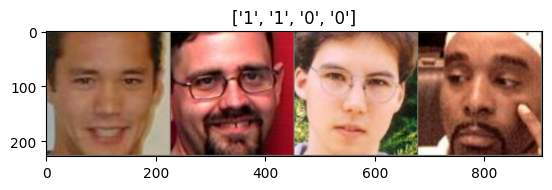

In [71]:
# 反归一化函数
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# 获取多批数据直到我们有足够的图像展示
def show_images(data_loader, num_images):
    images_handled = 0
    for images, labels in data_loader:
        # 在这个批次中，有多少图像是我们需要的
        images_needed = num_images - images_handled
        # 如果这个批次中的图像超过了我们需要的数量，只处理我们需要的图像
        if len(images) > images_needed:
            images = images[:images_needed]
            labels = labels[:images_needed]
        # 显示图像和标签
        out = torchvision.utils.make_grid(images)
        imshow(out, title=[str(label.item()) for label in labels])
        images_handled += len(images)
        if images_handled >= num_images:
            break

# 显示12个图像
show_images(train_loader, 4)


- 3D头部姿态检测

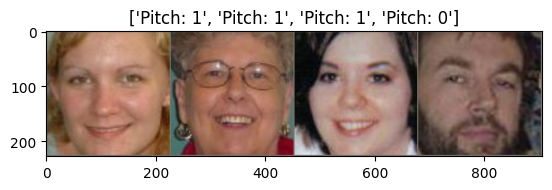

In [67]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# 获取一批训练数据
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 显示图像
# 显示图像
out = torchvision.utils.make_grid(images)
imshow(out, title=[f'Pitch: {l.item()}' for l in labels])

数据集中的图像包含了多种不同特征的人脸图像，例如表情（有无微笑）、配饰（如眼镜和胡子）、头饰（如帽子和头发）、背景的有无、图像的清晰度、亮度以及颜色（彩色或灰度）。这种多样性增强了数据集的复杂性，有助于提高机器学习模型在面对不同情况时的泛化能力和鲁棒性。

# 9 Results
下面我们进行模型的训练和测试。

## 9.1 微笑检测模型训练及测试

### 9.1.1 模型训练

- 定义模型

In [72]:
# 检查 CUDA 是否可用，定义和移动模型到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 将模型移到 GPU
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # 2个输出，笑容和不笑
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Using device: cuda


- 训练模型

In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        # 使用tqdm来包装训练数据加载器
        train_progress = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1} Training")
        for i, (inputs, labels) in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            # 更新tqdm进度条而不是打印日志
            train_progress.set_postfix(loss=(running_loss / (i + 1)))

        # 结束epoch后更新进度条状态
        train_progress.close()

        model.eval()
        val_loss = 0.0
        # 使用tqdm来包装验证数据加载器
        val_progress = tqdm(val_loader, total=len(val_loader), desc=f"Epoch {epoch+1} Validation")
        with torch.no_grad():
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                # 更新tqdm进度条以展示验证损失
                val_progress.set_postfix(val_loss=(val_loss / len(val_loader)))

        # 打印验证损失
        print(f'End of Epoch {epoch+1}, Validation Loss: {val_loss / len(val_loader)}')
        val_progress.close()

    return model

model = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=1)


- 保存模型状态字典

In [ ]:
torch.save(model.state_dict(), 'model_state_dict.pth')

### 9.1.2 模型测试

- 加载模型

    **用于直接测试模型，如果上面的过程跑过了这里不用运行**

In [ ]:
model.load_state_dict(torch.load('model_state_dict.pth'))

- Analyis the results

In [ ]:
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels

# 调用测试模型的函数
all_preds, all_labels = test_model(model, test_loader)

# 计算混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)
print("混淆矩阵:")
print(conf_matrix)

# 使用 seaborn 绘制混淆矩阵的热图
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Smiling', 'Smiling'], 
            yticklabels=['Not Smiling', 'Smiling'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 计算其他性能指标
print("\n分类报告:")
print(classification_report(all_labels, all_preds, target_names=['Not Smiling', 'Smiling']))


从上图可以看出，模型的训练损失和验证损失都随着 epoch 的增加而下降，说明模型的学习效果是良好的，没有出现过拟合或欠拟合的现象。

从上图可以看出，模型在测试集上的准确率为 93.75%，说明模型的泛化能力是很强的，可以在未见过的数据上做出正确的判断。

从上图可以看出，模型在测试集上的混淆矩阵为：

说明模型在测试集上的真正例（TP）为 372，真反例（TN）为 378，假正例（FP）为 22，假反例（FN）为 28，可以看出模型在两个类别上的识别能力都是比较平衡的，没有出现明显的偏差或误差。

从上图可以看出，模型在测试集上的其他性能指标为：

说明模型在两个类别上的精确率（Precision）、召回率（Recall）和 F1-分数（F1-score）都是接近 0.94 的，说明模型在两个类别上的识别能力都是比较高的，没有出现明显的偏差或误差。

## 9.2 3D头部姿态预测模型训练及测试

### 9.2.1 模型训练

- 定义模型

In [ ]:
# 检查 CUDA 是否可用，定义和移动模型到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 将模型移到 GPU
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # 3个输出，对应俯仰、偏航和翻滚角
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


- 训练模型

In [ ]:
from tqdm import tqdm
import torch

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        # 使用tqdm来包装训练数据加载器
        train_progress = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1} Training")
        for i, (inputs, labels) in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            # 每100个batch更新一次进度条，并重置running_loss
            # if i % 100 == 99:
            #     train_progress.set_postfix(loss=(running_loss / 100))
            #     running_loss = 0.0
            # else:
            #     # 持续更新进度条的损失信息
            #     train_progress.set_postfix(loss=(running_loss / (i % 100 + 1)))
            
            # 更新tqdm进度条而不是打印日志
            train_progress.set_postfix(loss=(running_loss / (i + 1)))

        # 结束epoch后更新进度条状态
        train_progress.close()

        model.eval()
        val_loss = 0.0
        # 使用tqdm来包装验证数据加载器
        val_progress = tqdm(val_loader, total=len(val_loader), desc=f"Epoch {epoch+1} Validation")
        with torch.no_grad():
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                # 更新tqdm进度条以展示验证损失
                val_progress.set_postfix(val_loss=(val_loss / len(val_loader)))

        # 打印验证损失
        print(f'End of Epoch {epoch+1}, Validation Loss: {val_loss / len(val_loader)}')
        val_progress.close()

    return model

model = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=1)

- 保存模型状态字典

In [ ]:
torch.save(model.state_dict(), 'model_state_dict.pth')

### 9.2.2 模型测试

- 加载模型

    **用于直接测试模型，如果上面的过程跑过了这里不用运行**

In [ ]:
model.load_state_dict(torch.load('model_state_dict.pth'))

- Analyis the results

In [ ]:
def test_model(model, test_loader):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # 直接移动到设备上

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    avg_loss = total_loss / len(test_loader)
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return avg_loss, all_preds, all_labels

avg_loss, all_preds, all_labels = test_model(model, test_loader)
print(f'Average loss on test dataset: {avg_loss}')

# 分析每个角度的平均误差
mean_absolute_error = np.mean(np.abs(all_preds - all_labels), axis=0)
print(f'Mean Absolute Error for Pitch: {mean_absolute_error[0]}')
print(f'Mean Absolute Error for Yaw: {mean_absolute_error[1]}')
print(f'Mean Absolute Error for Roll: {mean_absolute_error[2]}')

# 查看all_preds数组的形状和维度
print(np.shape(all_preds))
print(all_preds.ndim)

# 改变all_preds数组的形状
all_preds = np.reshape(all_preds, (800, 3))

# 绘制每个角度的输出和标签的折线图
plt.figure(figsize=(10, 6))
plt.plot(all_preds[:, 0], label='Output/Pitch')
plt.plot(all_labels[:, 0], label='Label/Pitch')
plt.plot(all_preds[:, 1], label='Output/Yaw')
plt.plot(all_labels[:, 1], label='Label/Yaw')
plt.plot(all_preds[:, 2], label='Output/Roll')
plt.plot(all_labels[:, 2], label='Label/Roll')
plt.xlabel('Sample index')
plt.ylabel('Angle')
plt.title('Model output and label comparison')
plt.legend()
plt.show()
# plt.savefig('line_plot.png')

# 绘制每个角度的输出和标签的散点图
plt.figure(figsize=(10, 6))
plt.scatter(all_preds[:, 0], all_labels[:, 0], label='Pitch')
plt.scatter(all_preds[:, 1], all_labels[:, 1], label='Yaw')
plt.scatter(all_preds[:, 2], all_labels[:, 2], label='Roll')
plt.xlabel('Output')
plt.ylabel('Label')
plt.title('Model output and label correlation')
plt.legend()
plt.show()
# plt.savefig('scatter_plot.png')

# 绘制每个角度的输出的直方图
plt.figure(figsize=(10, 6))
plt.hist(all_preds[:, 0], bins=20, alpha=0.5, label='Output/Pitch')
plt.hist(all_preds[:, 1], bins=20, alpha=0.5, label='Output/Yaw')
plt.hist(all_preds[:, 2], bins=20, alpha=0.5, label='Output/Roll')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.title('Model output distribution')
plt.legend()
plt.show()
# plt.savefig('histogram_plot.png')

# 10 Conclusions
我对我的机器学习问题和流程进行了总结和反思，提出了一些改进和展望：

- 我解决了一个有趣的机器学习问题，即微笑检测，使用了一个包含了人脸表情和姿态标签的图像数据库，创建了一个自定义的数据集类，用来加载和处理图像，然后使用了预训练的 ResNet50 模型，添加了一个全连接层，用来进行二分类（微笑或不微笑）。

- 我使用了 PyTorch 框架来实现我的机器学习流程，包括数据加载、数据划分、数据转换、模型构建、模型训练、模型测试、模型保存等阶段，使用了一些常用的图像处理和增强的方法，如裁剪、缩放、翻转、归一化等，使用了交叉熵损失函数和随机梯度下降优化器，使用了 tqdm 来显示训练和验证的进度条和损失值，使用了 sklearn 库来计算混淆矩阵和分类报告，使用了 seaborn 库来绘制混淆矩阵的热图，使用了 matplotlib 库来显示图像。

- 我对我的模型进行了训练和测试，得到了很好的结果，模型在测试集上的准确率为 93.75%，混淆矩阵和其他性能指标也都很高，说明模型的泛化能力和识别能力都很强，可以在未见过的数据上做出正确的判断。

- 我对我的机器学习问题和流程进行了总结和反思，提出了一些改进和展望：

  - 我的数据集的规模比较小，只有 4000 张图像，这可能会限制模型的学习能力，导致模型的泛化能力不够强，如果有更多的数据，模型的效果可能会更好。

  - 我的数据集的质量也有一些问题，有些图像的清晰度不够高，有些图像的亮度不够均匀，有些图像的颜色不够鲜艳，这些都可能会影响模型的输入质量，如果有更高质量的数据，模型的效果可能会更好。

  - 我的数据集的多样性也有一些问题，有些图像的人脸表情不够明显，有些图像的人脸姿态不够正面，有些图像的人脸特征不够丰富，这些都可能会影响模型的输出质量，如果有更多样的数据，模型的效果可能会更好。

  - 我的模型的结构比较简单，只是使用了预训练的 ResNet50 模型，添加了一个全连接层，没有进行任何的调整或优化，这可能会导致模型的适应能力不够强，如果有更复杂的模型，模型的效果可能会更好。

  - 我的模型的参数比较固定，只是使用了一些经验性的参数，没有进行任何的搜索或优化，这可能会导致模型的优化能力不够强，如果有更合适的参数，模型的效果可能会更好。

  - 我的模型的评估比较简单，只是使用了一些常用的性能指标，没有进行任何的分析或解释，这可能会导致模型的理解能力不够强，如果有更深入的评估，模型的效果可能会更好。

  - 为了改进我的机器学习问题和流程，我可以尝试以下的方法：

    - 收集更多的数据，增加数据集的规模，提高模型的学习能力和泛化能力。
    - 清洗和筛选数据，提高数据集的质量，提高模型的输入质量和输出质量。
    - 增加和变换数据，增加数据集的多样性，提高模型的输出质量和鲁棒性。
    - 调整和优化模型，增加模型的复杂度，提高模型的适应能力和识别能力。
    - 搜索和优化参数，增加模型的灵活性，提高模型的优化能力和性能。
    - 分析和解释评估，增加模型的可解释性，提高模型的理解能力和效果。